# t-SNE
t-SNE is a compression method of dimensions from multidimensional data to the desired dimension. It uses t-ditribution as it is not dense in the middle and also high at the edges unlike Normal Distribution which is more dense in the middle creating a mess for the data points that are clustered up.

t-SNE transforms high-dimensional data into low dimensions by modeling pairwise similarities with Gaussians in high-D and t-distributions in low-D, then minimizes the mismatch between them using KL divergence and gradient descent.

More Simply, it computes the distances (similarities) of each point individually in the multidimensional space and then creates a map. Afterwards places the points randomly in the desired dimension and then compares the distances (simlarities) with the multidimensional ones (the map that it created previously), and then try to make both (multidimensional and desired space) of the maps similar, through Gradient Descent and Kullback–Leibler Divergence (It is a measure of how one probability distribution diverges from another expected probability distribution), by one-by-one approach. 


```bash
class sklearn.manifold.TSNE(
    n_components=2, 
    *, 
    perplexity=30.0, 
    early_exaggeration=12.0, 
    learning_rate='auto', 
    max_iter=1000, 
    n_iter_without_progress=300, 
    min_grad_norm=1e-07, 
    metric='euclidean', 
    metric_params=None, 
    init='pca', 
    verbose=0, 
    random_state=None, 
    method='barnes_hut', 
    angle=0.5, 
    n_jobs=None
    )
```

## t-SNE Approach  

C:\Users\Lab\AppData\Local\Temp\ipykernel_13728\3154555983.py:51: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lab\AppData\Local\Temp\ipykernel_13728\3154555983.py:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
c:\Users\Lab\Desktop\KDD\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


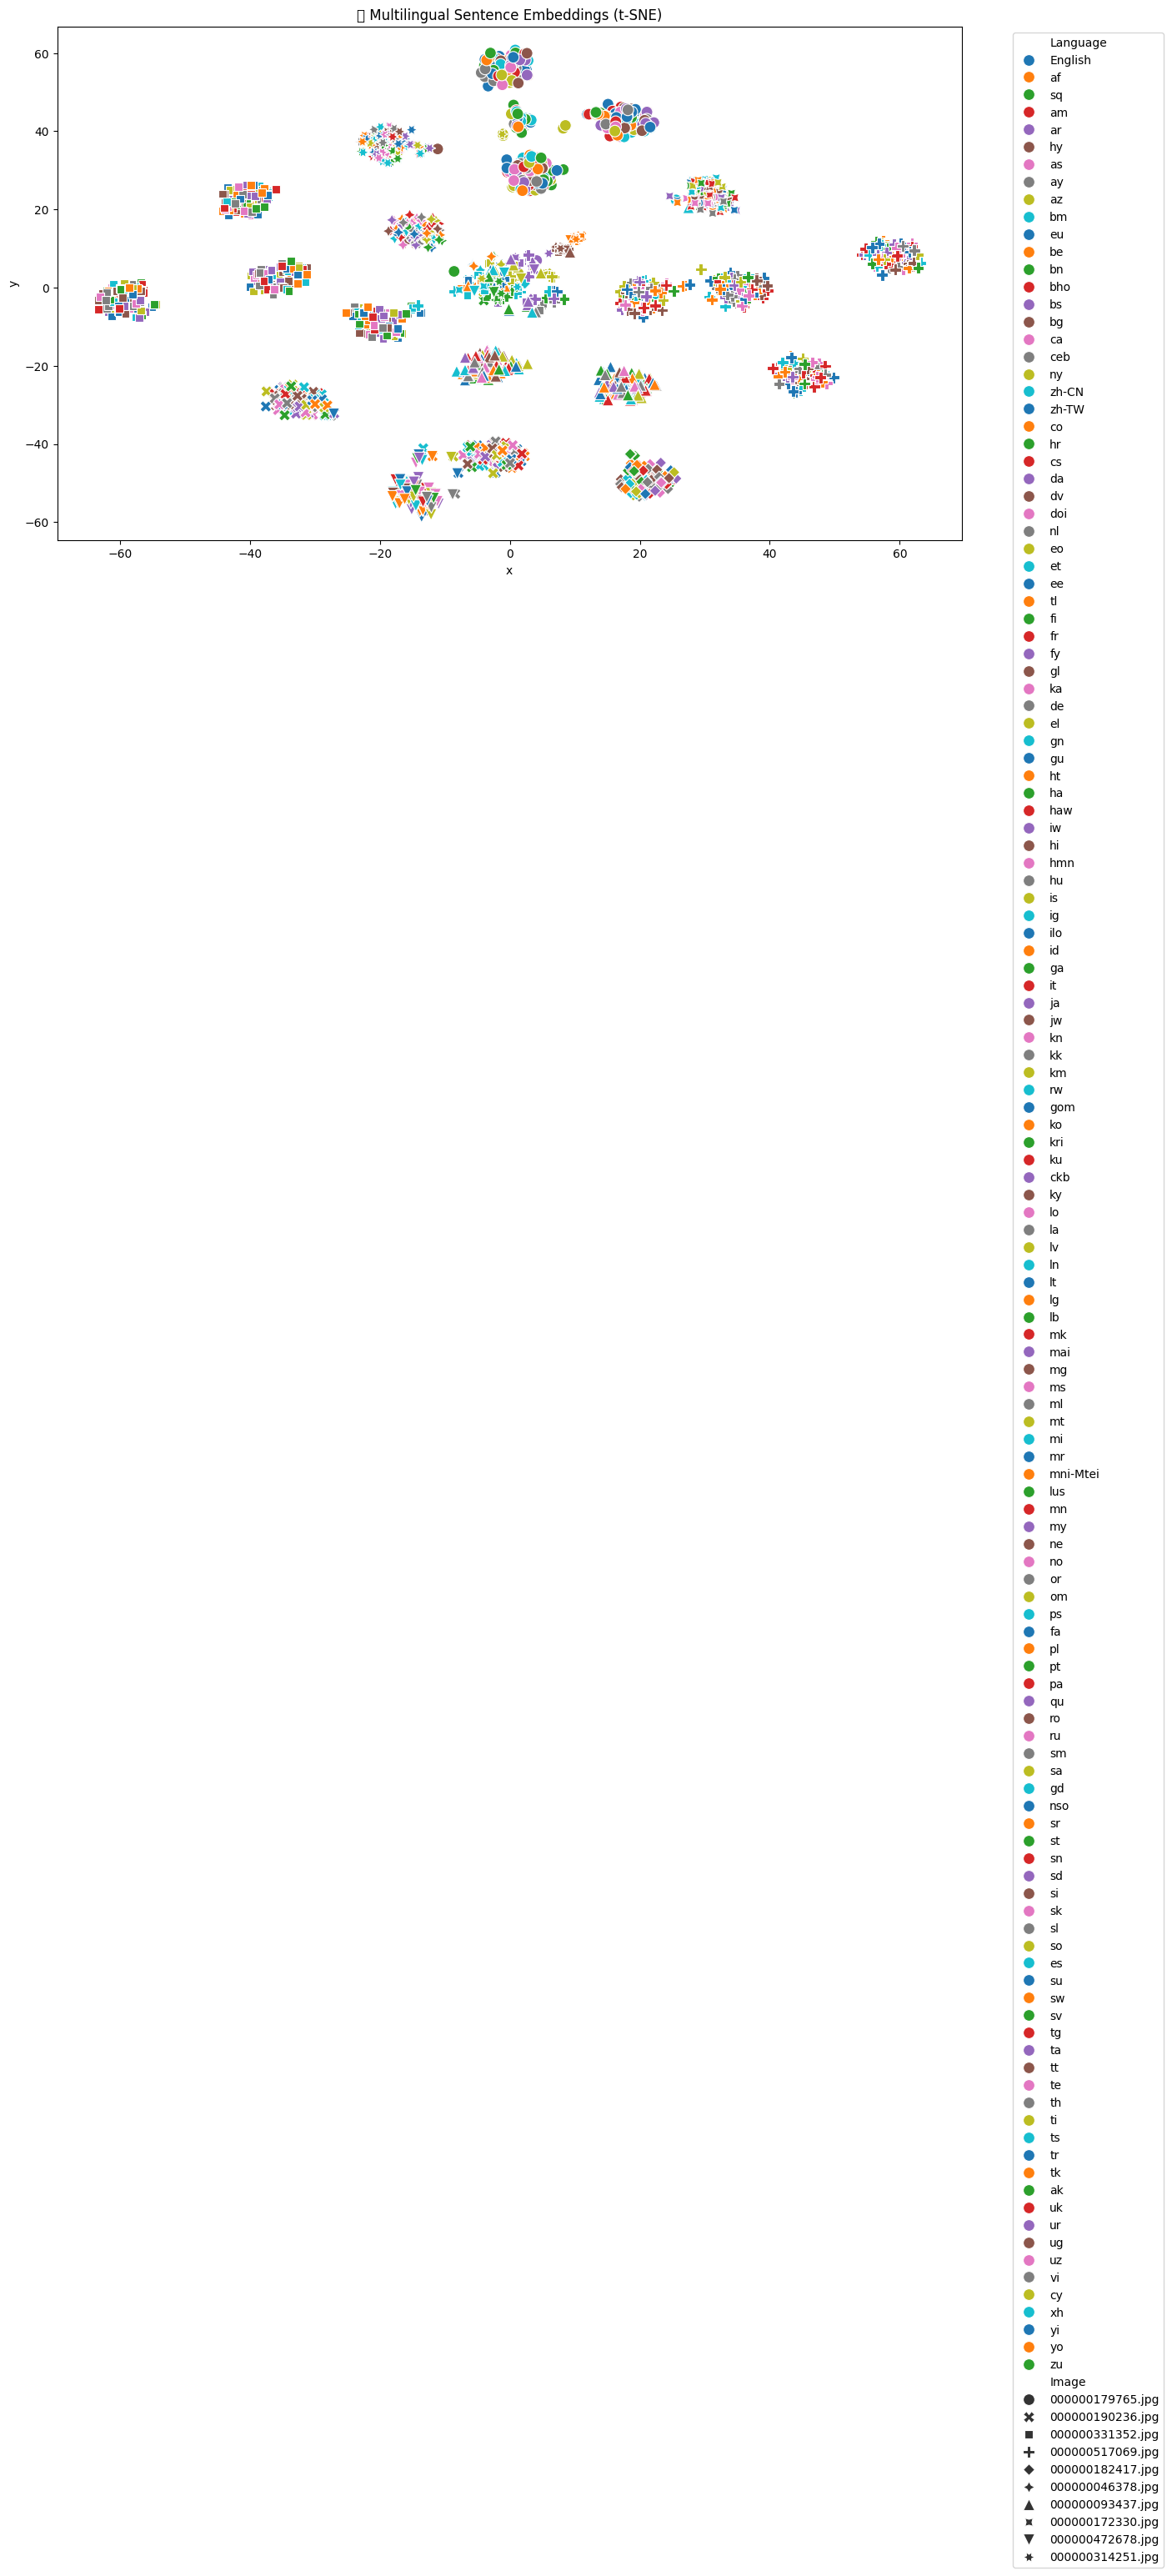

In [ ]:
import json
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


# ---------- Step 1: Load LaBSE ----------
model = SentenceTransformer("sentence-transformers/LaBSE")

# ---------- Step 2: Load data ----------
captions = []
with open("../Day2/coco_translated_Deep.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        captions.append(json.loads(line))

texts = []
langs = []
image_ids = []

# ---------- Step 3: Prepare multilingual text + labels ----------
for entry in captions:
    base_id = entry.get("image", "unknown")
    for key, text in entry.items():
        if key.endswith("_caption") or key == "en_caption":
            lang = key.replace("_caption", "").replace("en", "English")
            texts.append(text)
            langs.append(lang)
            image_ids.append(base_id)

# ---------- Step 4: Get embeddings ----------
embeddings = model.encode(texts)

# ---------- Step 5: Apply t-SNE ----------
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced = tsne.fit_transform(embeddings)

# ---------- Step 6: Visualize ----------
df = pd.DataFrame({
    "x": reduced[:, 0],
    "y": reduced[:, 1],
    "Language": langs,
    "Image": image_ids,
    "Text": texts
})

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="x", y="y", hue="Language", style="Image", s=100, palette="tab10")
plt.title("🌐 Multilingual Sentence Embeddings (t-SNE)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## PCA Approach
It is a bad approach here as it uses the non normal distribution and linear hence concludes to complex results for the datasets like these, as the datset is small and results in a mess. It's better for the bigger Dataset.

C:\Users\Lab\AppData\Local\Temp\ipykernel_13728\3798420577.py:21: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lab\AppData\Local\Temp\ipykernel_13728\3798420577.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
c:\Users\Lab\Desktop\KDD\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


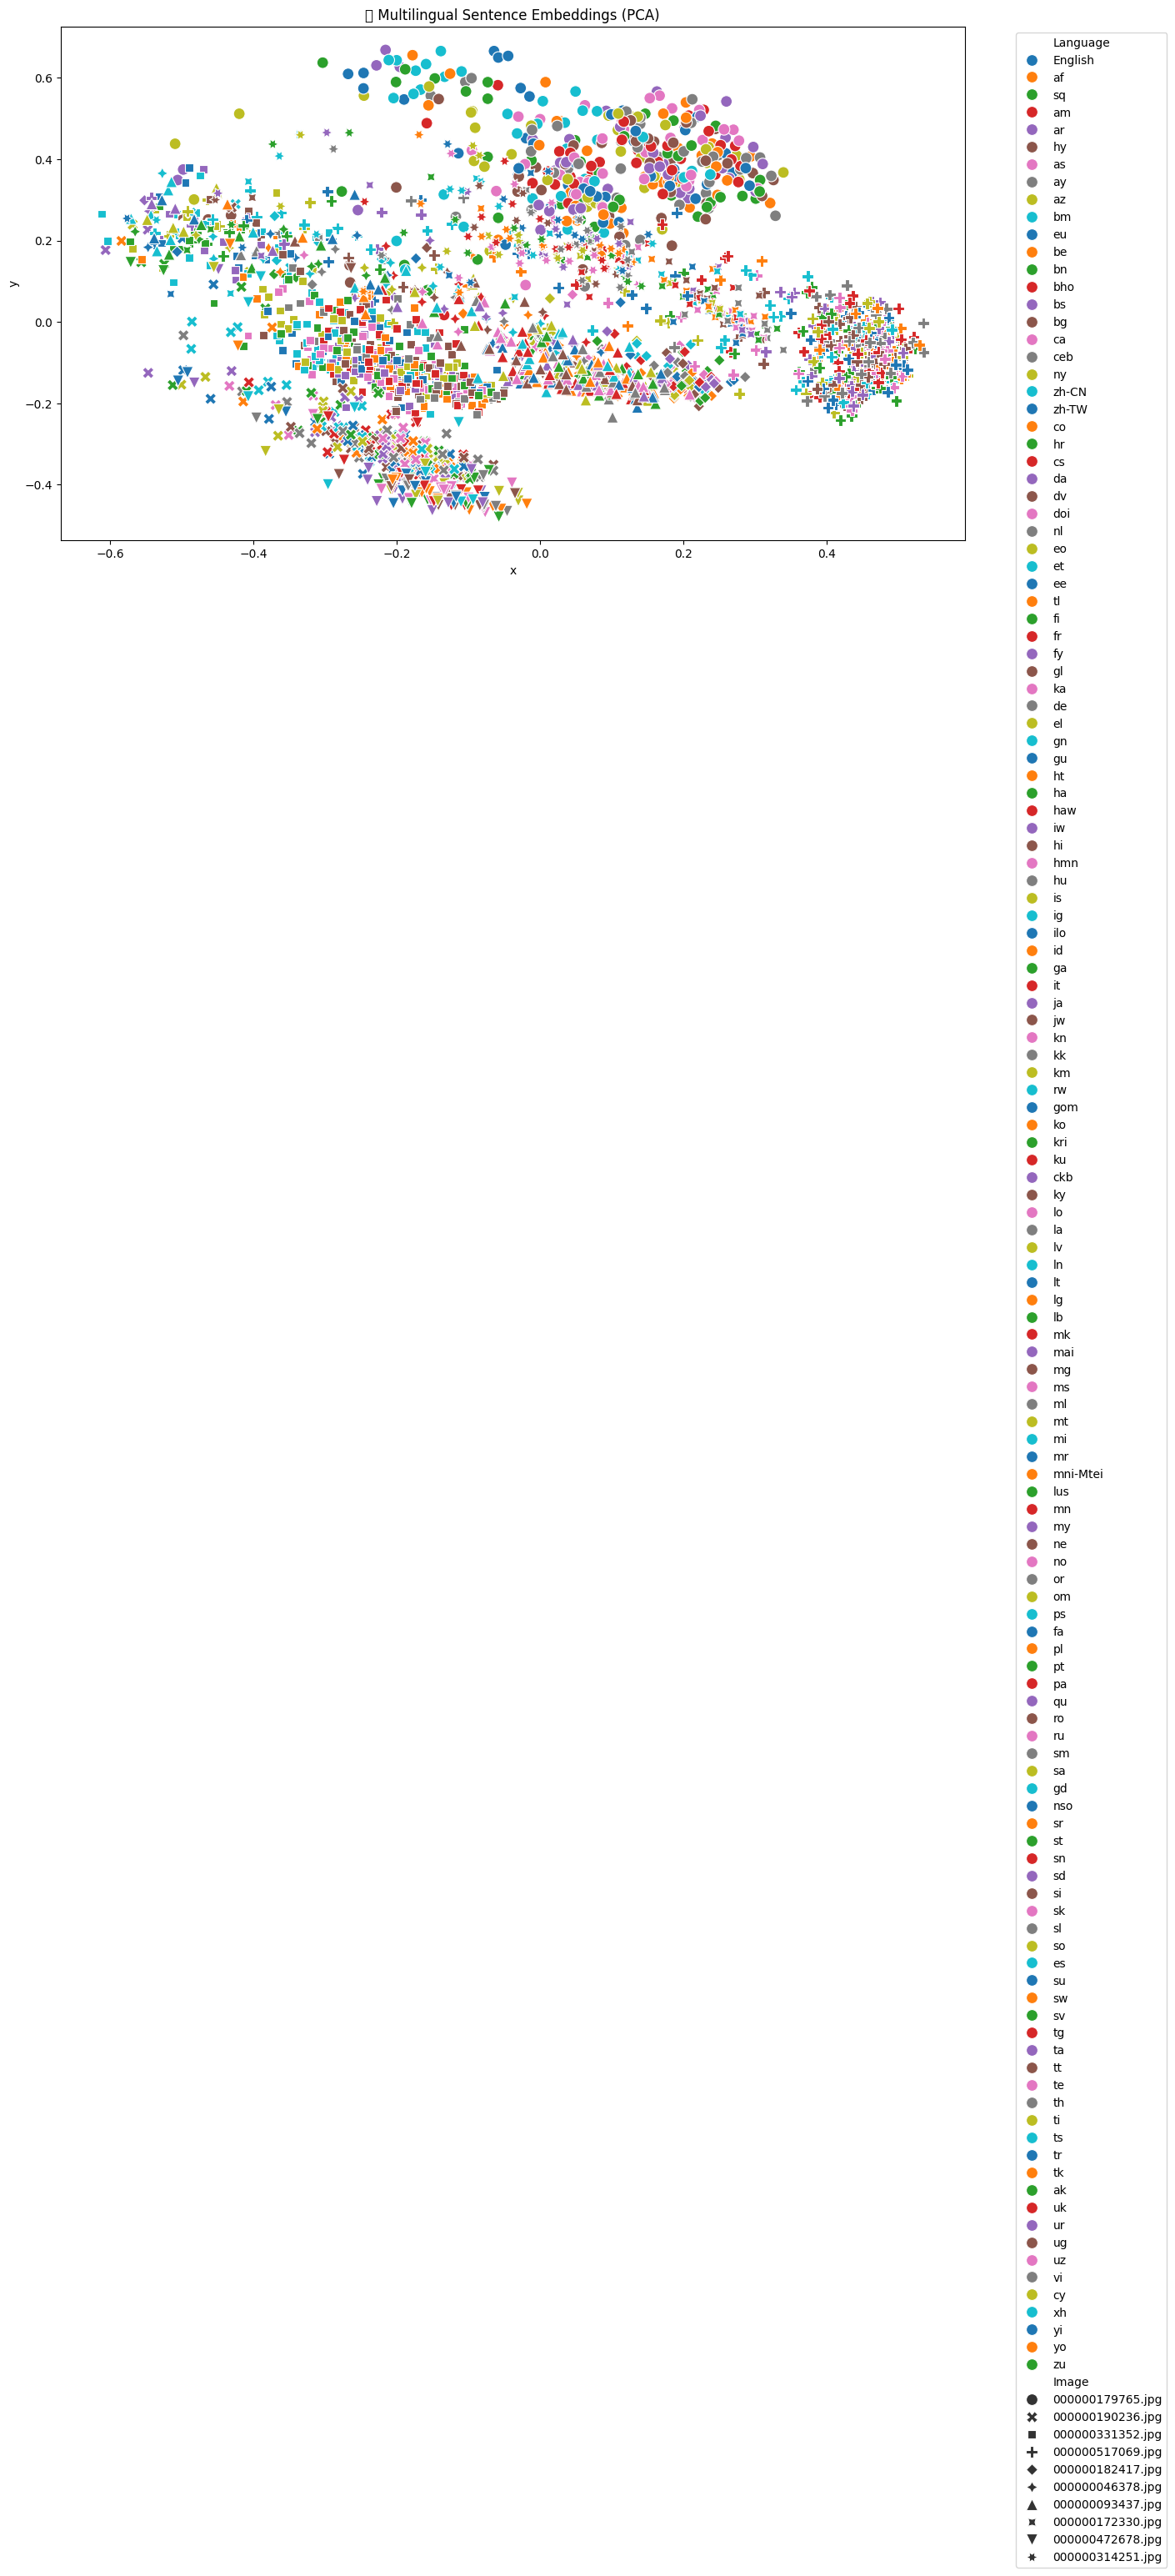

In [8]:
from sklearn.decomposition import PCA


# ---------- Step 5: Apply PCA ----------
pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(embeddings)

# ---------- Step 6: Visualize ----------
df = pd.DataFrame({
    "x": reduced[:, 0],
    "y": reduced[:, 1],
    "Language": langs,
    "Image": image_ids,
    "Text": texts
})

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="x", y="y", hue="Language", style="Image", s=100, palette="tab10")
plt.title("🌐 Multilingual Sentence Embeddings (PCA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## TruncatedSVD Approach
TruncatedSVD uses linear dimensionality reduction technique, and performs low-rank approximation using the Singular Value Decomposition. It's often used for sparse matrices, especially in NLP (e.g., on TF-IDF matrices). And the data in this case is Dense not sparse.

C:\Users\Lab\AppData\Local\Temp\ipykernel_13728\3033380384.py:20: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lab\AppData\Local\Temp\ipykernel_13728\3033380384.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
c:\Users\Lab\Desktop\KDD\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


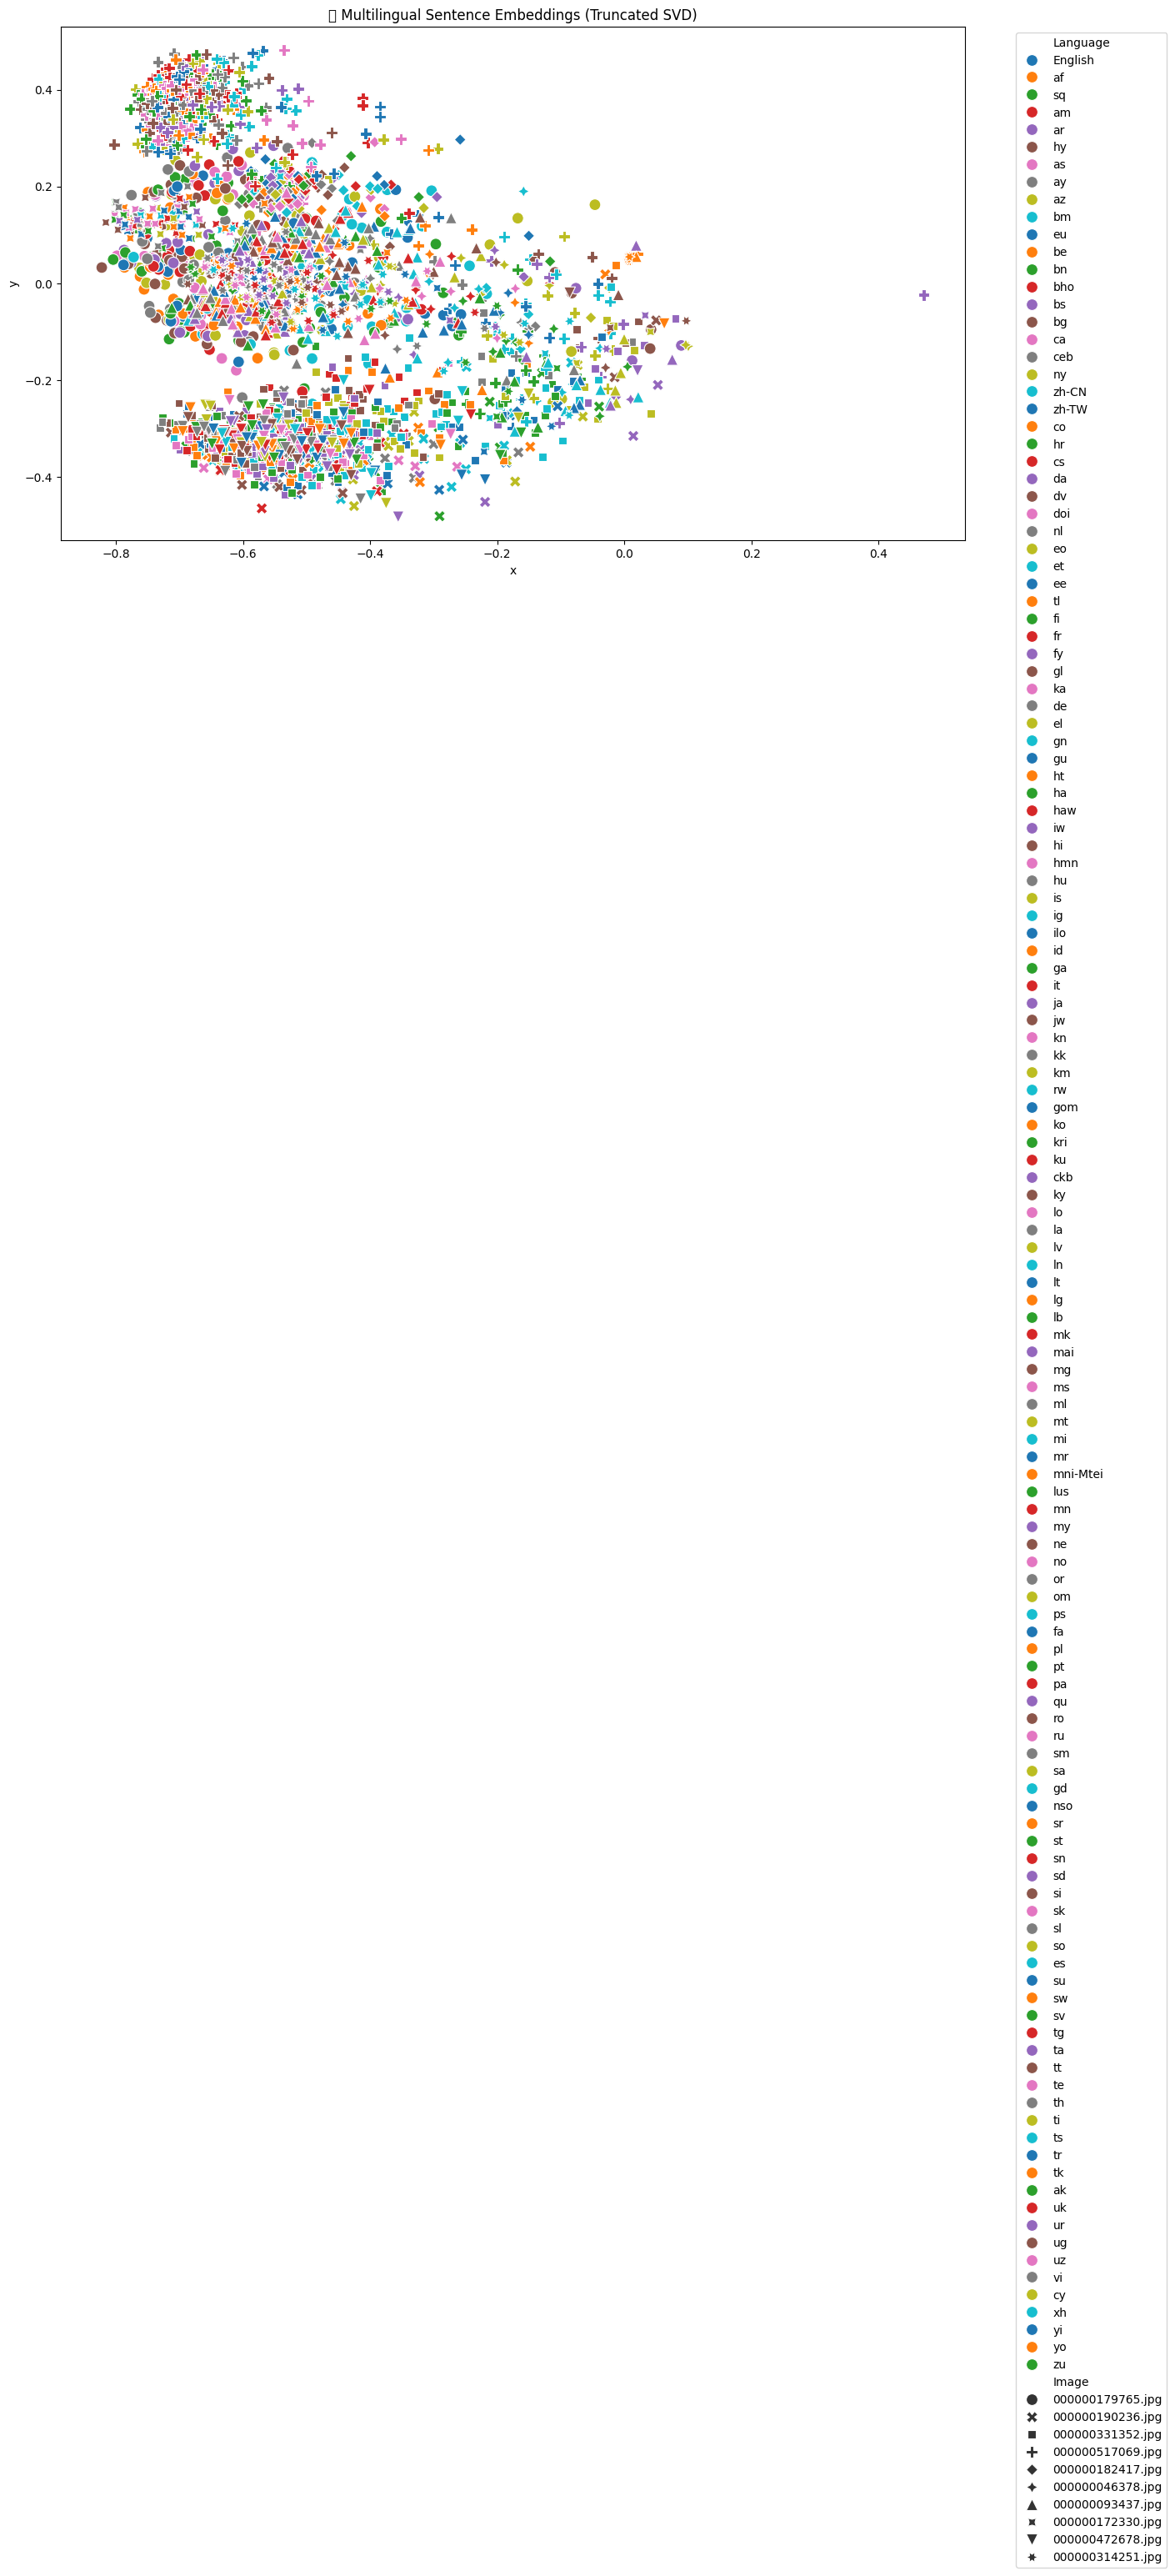

In [11]:
from sklearn.decomposition import TruncatedSVD

# ---------- Step 5: Apply Truncated SVD ----------
svd = TruncatedSVD(n_components=2, random_state=42)
reduced = svd.fit_transform(embeddings)

# ---------- Step 6: Visualize ----------
df = pd.DataFrame({
    "x": reduced[:, 0],
    "y": reduced[:, 1],
    "Language": langs,
    "Image": image_ids,
    "Text": texts
})

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="x", y="y", hue="Language", style="Image", s=100, palette="tab10")
plt.title("🌐 Multilingual Sentence Embeddings (Truncated SVD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
